<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:180%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           🚵Seoul-bike-trip-duration🚵
            
</p>
<style>
        h1{text-align: center;}
 </style>  
    
</div>

<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this project, I am using Bike trip duration data to optimize for Seoul Bike sharing system</b>
    
</div>
<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    <b>Some things to note:</b>
    To predict the trip
duration, data mining techniques are employed in this study to predict the trip duration of rental bikes in Seoul Bike sharing
system. The prediction is carried out with the combination of Seoul Bike data and weather data. The data used include trip
duration, trip distance, pickup and dropoff latitude and longitude, temperature, precipitation, wind speed, humidity, solar
radiation, snowfall, ground temperature and 1-hour average dust concentration. Feature engineering is done to extract
additional features from the data
  
</div>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>Importing Libraries</b></p>

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Model imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns',200)
%matplotlib inline

In [37]:
#Loading the data
path="/kaggle/input/seoul-bike-trip/For_modeling.csv"

In [38]:
data = pd.read_csv(path, 
                  dtype={
                      'Duration': 'int8',
                      'Distance': 'int8',
                      'PLong': 'float32',
                      'PLatd': 'float32',
                      'DLong': 'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'
                  },index_col=0
                  
                  ).sample(frac=1)

#checking for data
data.head(25)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
7625482,75,20,37.564697,126.912613,37.564697,126.912613,0.000000,10,13,21,13,5,10,13,22,29,5,12.600000,0.0,1.1,56.0,0.00,0.0,9.600000,10.0
3129192,38,18,37.520641,127.034508,37.514088,127.099030,5.737074,6,20,16,28,2,6,20,17,7,2,28.200001,0.0,3.9,48.0,2.55,0.0,46.400002,27.0
235059,34,-128,37.510429,127.071373,37.513126,127.100960,2.626839,2,16,15,2,4,2,16,15,38,4,4.000000,0.0,3.5,26.0,1.75,0.0,6.100000,36.0
3115617,39,-110,37.502232,127.002258,37.542347,126.943024,6.869195,6,20,8,7,2,6,20,8,47,2,20.600000,0.0,1.2,77.0,0.53,0.0,23.799999,35.0
5291735,10,80,37.564777,126.966148,37.544460,126.972389,2.325174,8,21,18,27,1,8,21,18,39,1,30.299999,0.0,1.7,56.0,0.80,0.0,29.299999,16.0
6596817,17,-36,37.626614,127.072754,37.637150,127.063271,1.438713,9,22,23,32,5,9,22,23,50,5,17.900000,0.0,1.0,66.0,0.00,0.0,15.400000,42.0
6841794,6,20,37.486767,127.046761,37.477509,127.045174,1.038925,9,28,8,47,4,9,28,8,53,4,15.200000,0.0,1.7,58.0,0.29,0.0,16.100000,37.0
4259255,53,112,37.559479,126.864380,37.517765,126.928413,7.306886,7,22,2,17,6,7,22,3,11,6,26.799999,0.0,0.6,63.0,0.00,0.0,24.000000,21.0
6150772,57,78,37.469200,127.029007,37.477531,127.141518,9.972041,9,12,18,5,2,9,12,19,2,2,27.000000,0.0,1.4,44.0,0.62,0.0,28.500000,17.0
303386,4,16,37.635109,127.068329,37.626614,127.072754,1.021822,2,26,14,12,0,2,26,14,17,0,9.900000,0.0,1.5,25.0,2.43,0.0,10.300000,74.0


In [39]:
#Resetting index
data = data.reset_index().drop(columns=['index'])
data.head(25)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,75,20,37.564697,126.912613,37.564697,126.912613,0.000000,10,13,21,13,5,10,13,22,29,5,12.600000,0.0,1.1,56.0,0.00,0.0,9.600000,10.0
1,38,18,37.520641,127.034508,37.514088,127.099030,5.737074,6,20,16,28,2,6,20,17,7,2,28.200001,0.0,3.9,48.0,2.55,0.0,46.400002,27.0
2,34,-128,37.510429,127.071373,37.513126,127.100960,2.626839,2,16,15,2,4,2,16,15,38,4,4.000000,0.0,3.5,26.0,1.75,0.0,6.100000,36.0
3,39,-110,37.502232,127.002258,37.542347,126.943024,6.869195,6,20,8,7,2,6,20,8,47,2,20.600000,0.0,1.2,77.0,0.53,0.0,23.799999,35.0
4,10,80,37.564777,126.966148,37.544460,126.972389,2.325174,8,21,18,27,1,8,21,18,39,1,30.299999,0.0,1.7,56.0,0.80,0.0,29.299999,16.0
5,17,-36,37.626614,127.072754,37.637150,127.063271,1.438713,9,22,23,32,5,9,22,23,50,5,17.900000,0.0,1.0,66.0,0.00,0.0,15.400000,42.0
6,6,20,37.486767,127.046761,37.477509,127.045174,1.038925,9,28,8,47,4,9,28,8,53,4,15.200000,0.0,1.7,58.0,0.29,0.0,16.100000,37.0
7,53,112,37.559479,126.864380,37.517765,126.928413,7.306886,7,22,2,17,6,7,22,3,11,6,26.799999,0.0,0.6,63.0,0.00,0.0,24.000000,21.0
8,57,78,37.469200,127.029007,37.477531,127.141518,9.972041,9,12,18,5,2,9,12,19,2,2,27.000000,0.0,1.4,44.0,0.62,0.0,28.500000,17.0
9,4,16,37.635109,127.068329,37.626614,127.072754,1.021822,2,26,14,12,0,2,26,14,17,0,9.900000,0.0,1.5,25.0,2.43,0.0,10.300000,74.0


In [40]:
#Checking the metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float64
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float64
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(11), float64(2), int8(12)
memory usage: 659.3 MB


Shape of df is 9,601,139 rows and 25 columns. Here are some observations based on the provided details:

- The DataFrame has a RangeIndex, indicating that the row indices start from 0 and increment by 1 for each row, up to 9,601,138.
- The DataFrame consists of 25 columns, each with a specific name and data type.
- The column names and their respective data types are listed as follows:
  
     -|Columns|                Details|
  1. Duration: int8 - trip duration 
  2. Distance: int8 - trip distance
  3. PLong: float32 - pickup longitude
  4. PLatd: float32 - pickup latitude
  5. DLong: float32 - dropoff longitude
  6. DLatd: float64 - dropoff latitude
  7. Haversine: float32 - haversine distance function calculate longittude and lattitude
  8. Pmonth: int8 - pickupmonth
  9. Pday: int8 - pickup day
  10. Phour: int8 - pickup hour
  11. Pmin: int8 - pickup minute
  12. PDweek: int8 - pickup day of the week
  13. Dmonth: int8 - dropoff month
  14. Dday: int8 - dropoff day
  15. Dhour: int8 - dropoff hour
  16. Dmin: int8 - dropoff minute
  17. DDweek: int8 - dropoff day of the week
  18. Temp: float32 - temperature
  19. Precip: float32 - precipitation
  20. Wind: float32 - windspeed
  21. Humid: float64 - humidity
  22. Solar: float32 - solar radiation
  23. Snow: float32 - snow fall
  24. GroundTemp: float32 - ground temperature
  25. Dust: float32 - 1 hour average fine dust concentration

- The memory usage of this DataFrame is approximately 659.3 MB, which is the amount of memory occupied by the DataFrame in the system.


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>EDA</b></p>

In [41]:
#Checking for Null values
print(data.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


In [42]:
#Checking for Statistic description
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.754739e+01,1.269908e+02,3.754747e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856202e+01,1.784856e-02,1.819275e+00,5.397565e+01,7.300678e-01,9.948929e-03,2.072377e+01,3.245798e+01
std,2.504333e+01,7.404757e+01,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736281e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [43]:
#comparing mean and sd for every column
std = data.std()
mean = data.mean()

# Iterate over each column
for column in data.columns:
    # Comparing standard deviation and mean
    if std[column] > mean[column]:
        print(f"The standard deviation is greater than the mean for {column}.")
    elif std[column] < mean[column]:
        print(f"The standard deviation is less than the mean for {column}.")
    else:
        print(f"The standard deviation is equal to the mean for {column}.")

The standard deviation is less than the mean for Duration.
The standard deviation is greater than the mean for Distance.
The standard deviation is less than the mean for PLong.
The standard deviation is less than the mean for PLatd.
The standard deviation is less than the mean for DLong.
The standard deviation is less than the mean for DLatd.
The standard deviation is greater than the mean for Haversine.
The standard deviation is less than the mean for Pmonth.
The standard deviation is less than the mean for Pday.
The standard deviation is less than the mean for Phour.
The standard deviation is less than the mean for Pmin.
The standard deviation is less than the mean for PDweek.
The standard deviation is less than the mean for Dmonth.
The standard deviation is less than the mean for Dday.
The standard deviation is less than the mean for Dhour.
The standard deviation is less than the mean for Dmin.
The standard deviation is less than the mean for DDweek.
The standard deviation is less t

### Obervations:

1)There are data points where harvesine value is zero, can be very short or cancelled trip

2)There are data points where the distance is negative

In [44]:
# Exploring the data point where haversine value are zeros
data[data['Haversine']==0].shape

(955083, 25)

In [45]:
#checking where some haversine are zeros
data[data['Haversine']==0].reset_index().drop(columns=['index']).head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,75,20,37.564697,126.912613,37.564697,126.912613,0.0,10,13,21,13,5,10,13,22,29,5,12.600000,0.0,1.1,56.0,0.00,0.0,9.6,10.0
1,2,-16,37.453281,127.051483,37.453281,127.051483,0.0,6,16,14,35,5,6,16,14,38,5,27.100000,0.0,1.8,40.0,3.26,0.0,43.0,20.0
2,55,-98,37.511982,127.085052,37.511982,127.085052,0.0,10,8,22,24,0,10,8,23,19,0,14.400000,0.0,1.1,49.0,0.00,0.0,11.0,20.0
3,15,-36,37.491112,127.022957,37.491112,127.022957,0.0,3,2,14,58,4,3,2,15,15,4,3.400000,0.0,2.4,23.0,2.74,0.0,7.6,87.0
4,10,10,37.599491,126.916862,37.599491,126.916862,0.0,8,18,22,3,5,8,18,22,14,5,26.299999,0.0,0.8,48.0,0.00,0.0,26.0,23.0


In [46]:
count = ((data['Haversine'] == 0) & (data['PLong'] != data['DLong']) & (data['PLatd'] != data['DLatd'])).sum()
print(f"Total data points with unequal latitude and longitude: {count}")


Total data points with unequal latitude and longitude: 0


In [47]:
#Dropping value with haversine ==0
data= data[data['Haversine']!=0].reset_index().drop(columns=['index'])
#data.shape

In [48]:
#Exploring the data points where Distance is negative

data[data['Distance']<0].shape
data[data['Distance']<0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1,34,-128,37.510429,127.071373,37.513126,127.100960,2.626839,2,16,15,2,4,2,16,15,38,4,4.000000,0.0,3.5,26.0,1.75,0.0,6.100000,36.0
2,39,-110,37.502232,127.002258,37.542347,126.943024,6.869195,6,20,8,7,2,6,20,8,47,2,20.600000,0.0,1.2,77.0,0.53,0.0,23.799999,35.0
4,17,-36,37.626614,127.072754,37.637150,127.063271,1.438713,9,22,23,32,5,9,22,23,50,5,17.900000,0.0,1.0,66.0,0.00,0.0,15.400000,42.0
9,10,-40,37.484531,127.120163,37.493179,127.118546,0.972141,10,25,8,36,3,10,25,8,46,3,7.900000,0.0,1.2,76.0,0.25,0.0,6.600000,22.0
10,49,-68,37.513248,126.939972,37.505852,126.939362,0.824157,10,7,16,16,6,10,7,17,6,6,20.700001,0.0,2.0,34.0,1.23,0.0,20.900000,23.0


In [49]:
#transforming all the negative distance to posiive distances

data["Distance"]=data['Distance'].apply(lambda x:abs(x))
data[data['Distance']<0].shape
    

(0, 25)

In [50]:
# Treatinf the values where distance is zero

data[data['Distance']==0].head()


,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
422,4,0,37.529675,127.119789,37.538582,127.122803,1.025452,8,19,11,30,6,8,19,11,36,6,28.400000,0.0,1.0,43.0,1.52,0.0,42.099998,27.0
443,13,0,37.535465,127.094482,37.531471,127.111092,1.530480,9,18,18,13,1,9,18,18,27,1,24.799999,0.0,1.4,48.0,0.51,0.0,26.200001,31.0
537,26,0,37.533512,126.972275,37.575947,126.974060,4.721186,10,20,18,45,5,10,20,19,13,5,16.600000,0.0,2.4,41.0,0.04,0.0,14.400000,40.0
644,18,0,37.549561,126.905754,37.551140,126.936989,2.759191,9,27,8,28,3,9,27,8,47,3,14.800000,0.0,1.1,51.0,0.59,0.0,13.300000,5.0
746,26,0,37.536381,127.137253,37.499985,127.135391,4.050386,9,29,19,8,5,9,29,19,35,5,22.500000,0.0,0.4,43.0,0.00,0.0,19.400000,24.0


In [51]:
data[data['Distance']==0].shape

(62196, 25)

In [52]:
#Dropping values with diatance is zero, that indicate trip was never occured or error in recordings or something
data = data[data['Distance']!=0].reset_index().drop(columns=['index'])
data[data['Distance']==0].shape

(0, 25)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>Visualizations</b></p>

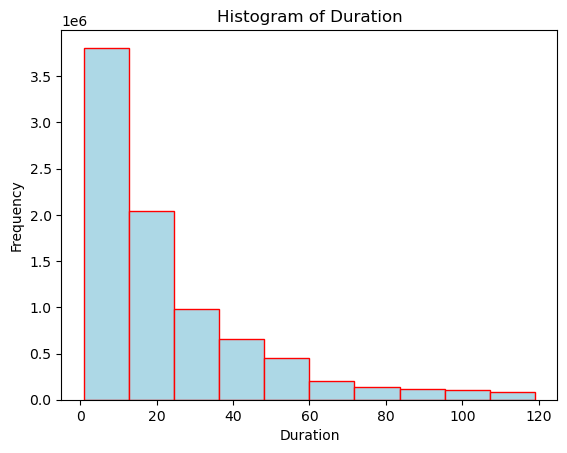

In [53]:
#Histogram of 'Duration' 
plt.hist(data['Duration'], bins=10,color = "lightblue", ec="red")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

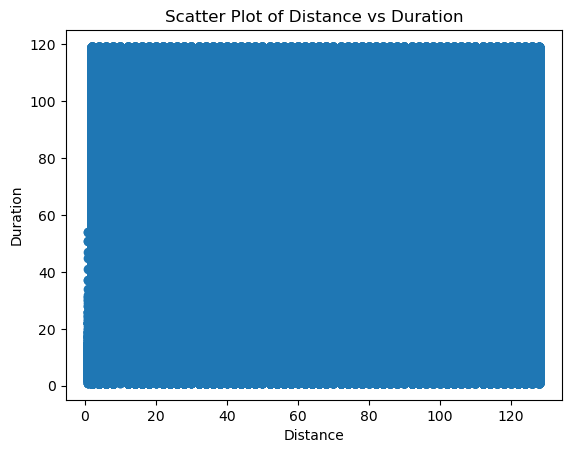

In [54]:
#Scatter plot of 'Distance' versus 'Duration'
plt.scatter(data['Distance'], data['Duration'])
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Scatter Plot of Distance vs Duration')
plt.show()

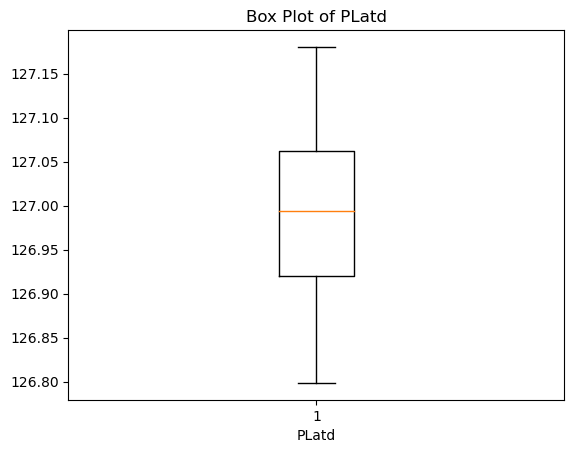

In [55]:
#Box plot of 'PLatd' 
plt.boxplot(data['PLatd'])
plt.xlabel('PLatd')
plt.title('Box Plot of PLatd')
plt.show()

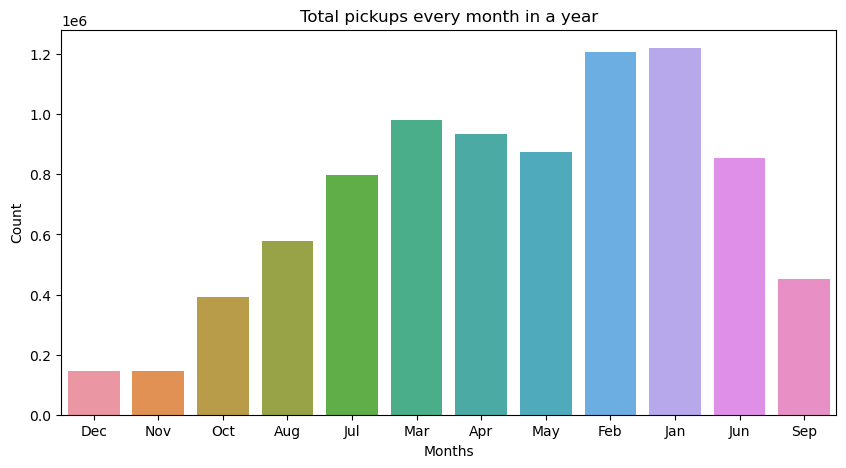

In [56]:
# Total pickups every month in a year
temp =data['Pmonth'].value_counts()
month_lables = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pick_up_months = temp.index
trips_count =temp.values

plt.figure(figsize=(10,5))
sns.barplot(x=pick_up_months, y=trips_count)
plt.xlabel("Months")
plt.ylabel("Count")
plt.xticks(pick_up_months-1, month_lables)
plt.title("Total pickups every month in a year")
plt.show()

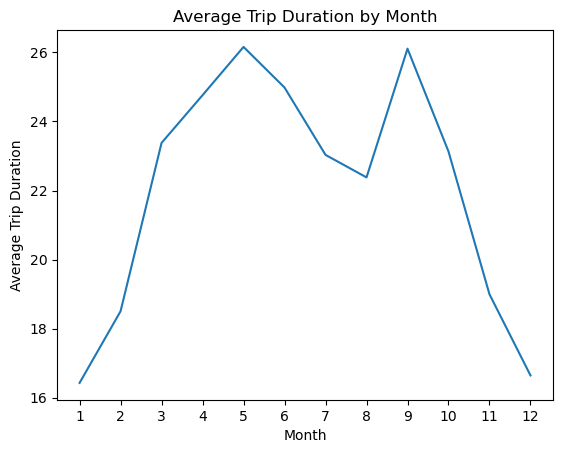

In [57]:
#Average Trip Duration by Month
average_duration = data.groupby('Pmonth')['Duration'].mean()

# Create the line chart
plt.plot(average_duration.index, average_duration.values, )
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.xticks(average_duration.index)
plt.show()

In [58]:
#Average Trip Duration by Day of Week
# Convert the 'PDweek' column to a day of the week name
data1= pd.Categorical(data['PDweek'], categories=range(7), ordered=True)
data1.cat.rename_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)

# Calculate the average trip duration for each day of the week
average_duration = data1.groupby('DayOfWeek')['Duration'].mean()

# Create a line chart
plt.plot(average_duration.index, average_duration.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Duration')
plt.title('Average Trip Duration by Day of Week')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'Categorical' object has no attribute 'cat'

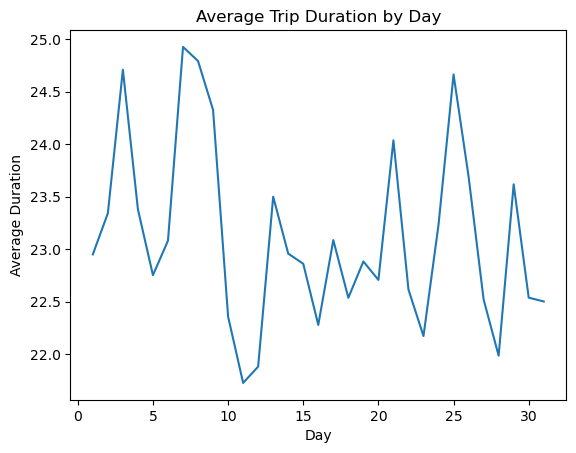

In [59]:
# Average Trip Duration by Day
average_duration = data.groupby('Pday')['Duration'].mean()

plt.plot(average_duration.index, average_duration.values)
plt.xlabel('Day')
plt.ylabel('Average Duration')
plt.title('Average Trip Duration by Day')
plt.show()

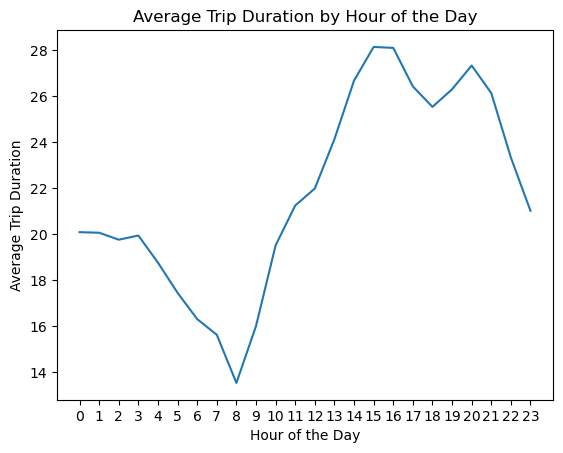

In [60]:
#Average Trip Duration by Hour of the Day
average_duration = data.groupby('Phour')['Duration'].mean()

plt.plot(average_duration.index, average_duration.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of the Day')
plt.xticks(range(24))
plt.show()

### Observations

From Total pick ups every month in a year plot, More number of pick ups happen during January and February months

From Average trip duration in each Month plot. The average trip duration is less during monitis November, December, January and February Sience s

the period of time in which South Korsa experiences winter season. (This shows the duration is affected by the lamperature)

From Average trip duration in each Day of a Week prot, we can observe that the average trip duration is high during weekends

From Average trip duration on each hour in a day plat. The average trip duration is high sturing 15th, 10th and 20th hours of the day From the above observations we can say that temperature and time as influential factors for trip duration estimation

In [61]:
# Seprating into 

continuous_data_columns =[column_name for column_name in data.columns if data[column_name].nunique()>40] 
categorical_data_columns =[column_name for column_name in data.columns if column_name not in continuous_data_columns] 
print("Continuous Data Columns : ", continuous_data_columns)

print("categorical Data Columns : ", categorical_data_columns)


Continuous Data Columns :  ['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmin', 'Dmin', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
categorical Data Columns :  ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek']


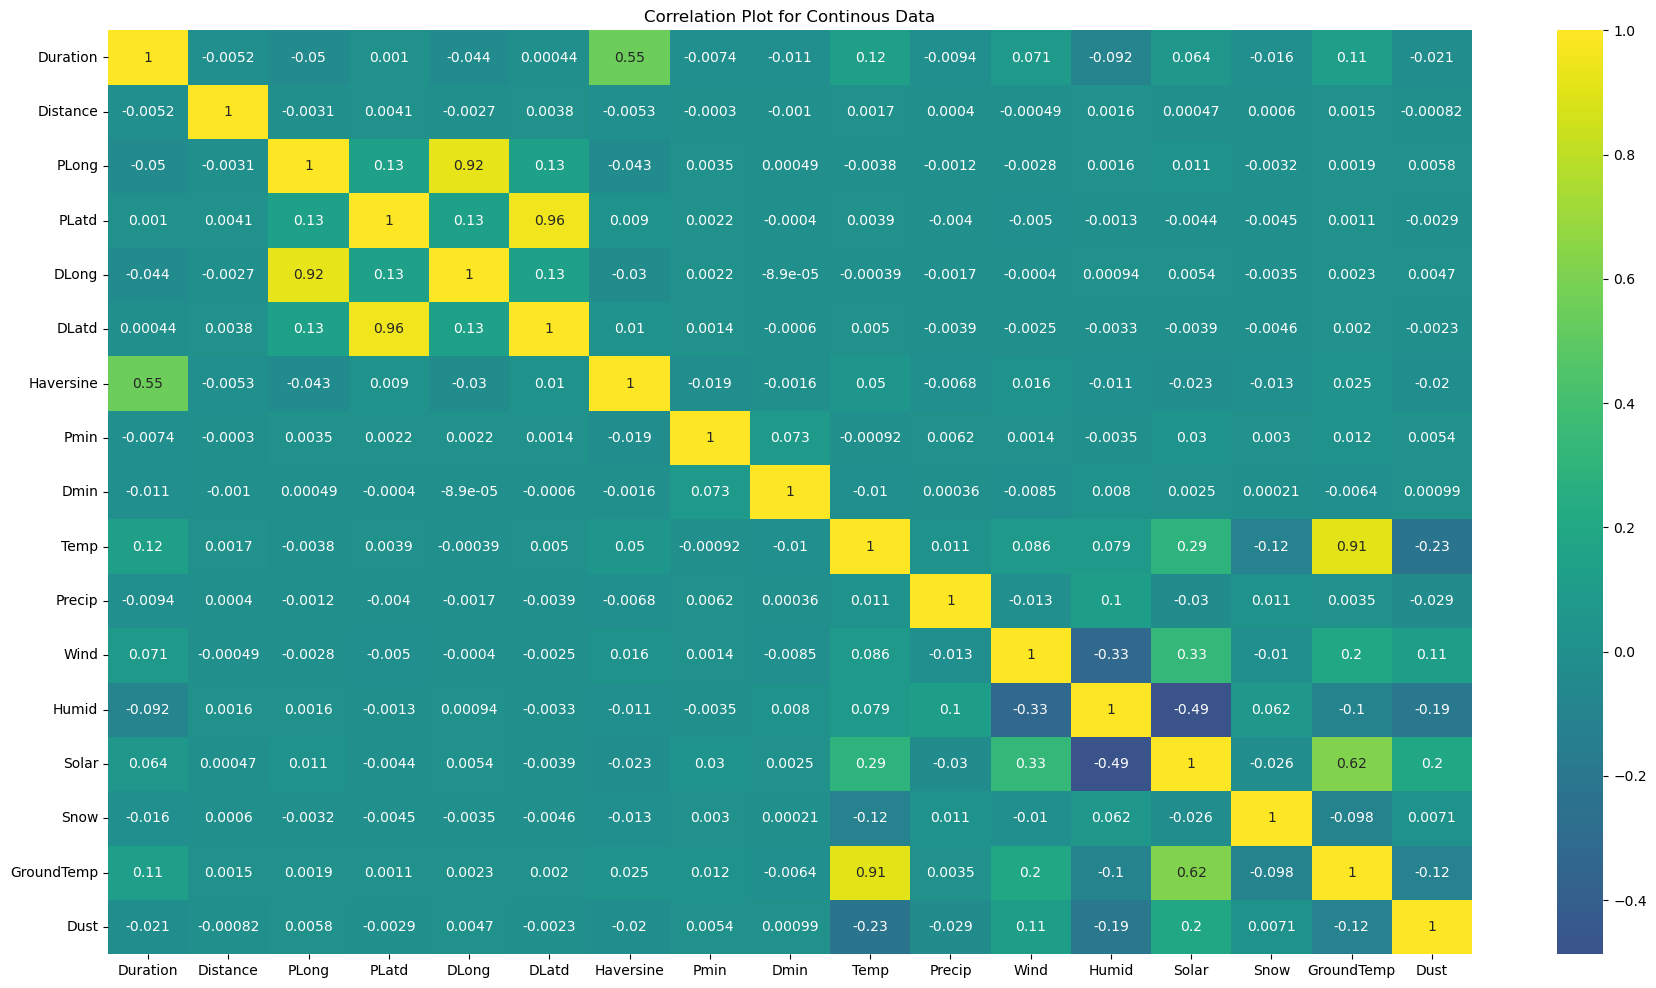

In [62]:
#heatmap
plt.figure(figsize=(22,12))
sns.heatmap(data[continuous_data_columns].corr(), annot=True, center=0, cmap='viridis')
plt.title("Correlation Plot for Continous Data")
plt.show()

### Observations
Temp and GroundTemp are highly correlated, other distance can be ignored as they are lat and log values

In [63]:
#Saving hte cleaned data

#data.to_csv('cleaned_data.csv', index=False)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>Modelling</b></p>

In [64]:
#Splitting into train and test sets
X_train,X_test, y_train, y_test = train_test_split(data.drop(columns=['Duration']), data['Duration'], test_size=0.25, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6437895, 24) (6437895,)
(2145965, 24) (2145965,)


In [65]:
#Functions for metrics
def rmse(y_true, predictions):
    return mean_squared_error(y_true, predictions)**0.5

def get_metrics(y_true, predictions):
    print("="*50)
    print(f"MAE: {mean_absolute_error(y_true, predictions)}")
    print(f"MSE: {mean_squared_error(y_true, predictions)}")
    print(f"RMSE: {rmse(y_true, predictions)}")
    print(f"R2 Score: {r2_score(y_true, predictions)}")
    print("="*50)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>Scaling</b></p>

In [67]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>Linear Regression</b></p>

In [69]:
%%time
#Lrg model

lrg =LinearRegression()
lrg.fit(scaled_X_train, y_train)

CPU times: user 12.1 s, sys: 4.34 s, total: 16.4 s
Wall time: 13.1 s


LinearRegression()

In [71]:
#Predictionon test data
lrg_preds=lrg.predict(scaled_X_test)
get_metrics(y_test, lrg_preds)

MAE: 12.116099591565941
MSE: 349.42449815474504
RMSE: 18.692899672194923
R2 Score: 0.3319251309657566


In [73]:
#Predictionon training data
preds =lrg.predict(scaled_X_train)
get_metrics(y_train, preds)

MAE: 12.114808313327542
MSE: 349.1651338647571
RMSE: 18.685960876143273
R2 Score: 0.3318633592442741


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>XGBoost Regressor</b></p>

In [76]:
%%time
from xgboost import XGBRegressor
xgb_model =XGBRegressor(random_state=24)
xgb_model.fit(X_train, y_train)

CPU times: user 5min 24s, sys: 10 s, total: 5min 34s
Wall time: 3min 9s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=24, ...)

In [77]:
#Training on test data
preds_xgb=xgb_model.predict(X_test)
get_metrics(y_test, preds_xgb)

MAE: 2.8739922046661377
MSE: 27.70180892944336
RMSE: 5.263250794845649
R2 Score: 0.9470361355127432


In [78]:
#Training on train data
xgb_preds=xgb_model.predict(X_train)
get_metrics(y_train, xgb_preds)

MAE: 2.8586151599884033
MSE: 27.374427795410156
RMSE: 5.23205770184257
R2 Score: 0.9476183154465092


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>Catboost</b></p>

In [80]:
%%time
import catboost as ctb
cat_model =ctb.CatBoostRegressor(loss_function="RMSE", task_type="GPU")


CPU times: user 1.43 ms, sys: 29 µs, total: 1.46 ms
Wall time: 5.38 ms


In [83]:
train_dataset =ctb.Pool(X_train, y_train)
test_dataset =ctb.Pool(X_test, y_test)

In [89]:
%%time
grid ={'iterations':[100,150,200,250],
       'learning_rate':[0.005, 0.001, 0.003,0.01,0.1],
       'depth':[2,4,6,8]
       }
cat_model.grid_search(grid, train_dataset)

0:	learn: 32.4145966	test: 32.4260830	best: 32.4260830 (0)	total: 122ms	remaining: 12.1s
1:	learn: 32.3124607	test: 32.3240849	best: 32.3240849 (1)	total: 232ms	remaining: 11.3s
2:	learn: 32.2108882	test: 32.2226401	best: 32.2226401 (2)	total: 344ms	remaining: 11.1s
3:	learn: 32.1100626	test: 32.1218761	best: 32.1218761 (3)	total: 476ms	remaining: 11.4s
4:	learn: 32.0099303	test: 32.0218925	best: 32.0218925 (4)	total: 599ms	remaining: 11.4s
5:	learn: 31.9104137	test: 31.9225129	best: 31.9225129 (5)	total: 714ms	remaining: 11.2s
6:	learn: 31.8115748	test: 31.8237944	best: 31.8237944 (6)	total: 814ms	remaining: 10.8s
7:	learn: 31.7131050	test: 31.7254252	best: 31.7254252 (7)	total: 911ms	remaining: 10.5s
8:	learn: 31.6152782	test: 31.6277684	best: 31.6277684 (8)	total: 1s	remaining: 10.2s
9:	learn: 31.5185276	test: 31.5310814	best: 31.5310814 (9)	total: 1.1s	remaining: 9.93s
10:	learn: 31.4220391	test: 31.4347263	best: 31.4347263 (10)	total: 1.2s	remaining: 9.68s
11:	learn: 31.3265910	te

{'params': {'depth': 8, 'iterations': 250, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [90]:
#Test prediction
cat_preds =cat_model.predict(X_test)
get_metrics(y_test,cat_preds)

MAE: 2.8925553460878737
MSE: 29.709857146373423
RMSE: 5.45067492576593
R2 Score: 0.9431968593303968


In [91]:
#Train prediction
get_metrics(y_train,cat_model.predict(X_train))

MAE: 2.887171764747308
MSE: 29.526590350109437
RMSE: 5.433837534386673
R2 Score: 0.9435000950091031


In [93]:
#saving catboost
cat_model.save_model("Seoul_catboost")

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>LightGBM</b></p>

In [95]:
!pip install lightgbm

from lightgbm import LGBMRegressor


In [96]:
lgbm_model = LGBMRegressor(random_state =24, n_jobs=-1)


In [97]:
%%time
lgbm_model.fit(X_train, y_train)

CPU times: user 3min 7s, sys: 2.25 s, total: 3min 9s
Wall time: 1min 40s


LGBMRegressor(random_state=24)

In [99]:
lgbm_preds = lgbm_model.predict(X_test)
get_metrics(y_test, lgbm_preds)

MAE: 4.795607413357525
MSE: 72.1912223085161
RMSE: 8.496541785250992
R2 Score: 0.8619755007337087


In [ ]:
%%time
#Hyperparameter for LightGBM
from sklearn.model_selection import GridSearchCV
lgbm_params={
    'n_estimators':[100,200],
    'learning_rate':[0.001, 0.1],
    'num_leaves':[20,80]
}

lgbm_reg = LGBMRegressor(random_state=24, n_jobs=-1)
lgbm_grid_search =GridSearchCV(
    lgbm_reg,
    param_grid=lgbm_params,
    cv=3,
    verbose=3,
    n_jobs=-1
)

lgbm_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
#Best parameters
lgbm_grid_search.best_params_

In [ ]:
%%time
lgbm_final_model =LGBMRegressor(**{'learning_rate':0.01, 'n_estimator':200, 'num_leaves':80}, random_state=24, n_jobs=-1)
lgbm_final_model.fit(X_train, y_train)

In [ ]:
#Test Predication
pred=lgbm_final_model.predict(X_test)
get_metrics(y_test, pred)

In [ ]:
#train prediction
pred=lgbm_final_model.predict(X_Train)
get_metrics(y_train, pred)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px"><b>From above CatBoost works best</b></p>